# Social media analysis
We are going to use a modified example taken from Wintjen M (2020) "Practical Analysis Using Jupyter Notebook" pp 264-

##  Set-up
> 1. install a non-standard python module nltk - natural language toolkit to add in functions we need
> 2. Add is pandas as pd and numpy as np
> 3. inline version matplotlib #look it up

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is designed to be sensitive to both positive and negative sentiment, as well as the intensity of the sentiment.

VADER uses a combination of a dictionary of lexical features and a set of rules to assign a sentiment score to a piece of text. The dictionary contains words and phrases that are commonly associated with positive or negative sentiment, as well as words and phrases that indicate the intensity of the sentiment. The rules take into account the context in which the words and phrases are used, as well as other factors such as capitalization and punctuation.

Using VADER, it is possible to accurately identify and quantify the sentiment of text data, such as social media posts or customer reviews. This can be useful for a variety of applications, such as analyzing customer feedback or social media posts to understand the overall sentiment about a product or service.

In [1]:
! pip install nltk

#! pip install git+https://github.com/tweepy/tweepy.git

import nltk
import pandas as pd
import numpy as np
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


The first line of code installs the nltk library using the pip package manager. This is necessary if the nltk library is not already installed on your system.

The second line of code is commented out, so it will not be executed. This line of code would install the tweepy library using pip and a Git URL.

The next three lines of code import the nltk, pandas, and numpy libraries into the current Python script or notebook. The import statements make the functions and objects defined in these libraries available to be used in the script or notebook.

The final line of code, %matplotlib inline, is a magic command that is used to configure Matplotlib, a plotting library, to display plots within the notebook. This allows you to see the plots that are generated by Matplotlib without having to save them to a file and view them separately.

! pip is a command that is used to run the pip package manager from the command line. pip is a tool for installing and managing Python packages, which are collections of modules that provide additional functionality to Python. The ! symbol is used to indicate that the following command should be run in the command line, rather than in the Python interpreter.

% is a special symbol in IPython (an interactive shell for Python) that is used to indicate a magic command. Magic commands are special commands that are not part of the Python language, but provide additional functionality within the IPython environment. For example, the %matplotlib magic command is used to configure the Matplotlib plotting library to display plots within the IPython environment.

## Next stage

In [3]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
anlysr=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Azaz\AppData\Roaming\nltk_data...


The first line of code, nltk.download('vader_lexicon'), downloads the vader_lexicon data package from the Natural Language Toolkit (nltk) library. The vader_lexicon is a lexicon (a list of words and their associated sentiment scores) that is used by the SentimentIntensityAnalyzer in the nltk library to perform sentiment analysis.

The next two lines of code import the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module and create an instance of the SentimentIntensityAnalyzer class, which is stored in a variable called anlysr.

The SentimentIntensityAnalyzer class provides methods for calculating the sentiment intensity (i.e., the positivity, negativity, or neutrality) of a piece of text. Once the anlysr object is created, you can use its methods to perform sentiment analysis on text data.

## next stage
> 1. load in the tweet data
> 2. As a quick check see a few examples top of the list
> 3. Set up variables for out four categories

In [4]:
the_data=pd.read_csv('tweet_activity.csv')
the_data.head()
score_compound=[]
score_positive=[]
score_negative=[]
score_neutral=[]

The first line of code, the_data=pd.read_csv('tweet_activity.csv'), uses the read_csv function from the pandas library to read in data from a CSV file called tweet_activity.csv and store it in a Pandas dataframe called the_data.

The second line of code, the_data.head(), displays the first few rows of the dataframe using the head method. This can be useful for getting a feel for the structure and content of the data.

The next four lines of code create four empty lists called score_compound, score_positive, score_negative, and score_neutral. These lists will be used to store the results of sentiment analysis that is performed on the data in the the_data dataframe. The score_compound list will store the compound sentiment scores, which are normalized scores that range from -1 (most negative) to 1 (most positive). The score_positive, score_negative, and score_neutral lists will store the positive, negative, and neutral sentiment scores, respectively. These scores are not normalized and represent the raw positivity, negativity, or neutrality of the text.

the_data.head() is a method of a Pandas dataframe that displays the first few rows of the dataframe. By default, it displays the first 5 rows, but you can specify a different number of rows to display by passing an integer as an argument to the head method. For example, the_data.head(10) would display the first 10 rows of the the_data dataframe.

## next step

In [5]:
i=0
while (i<len(the_data)):
    my_anlysr=anlysr.polarity_scores(the_data.iloc[i]['Tweet text'])
    score_compound.append(my_anlysr['compound'])
    score_positive.append(my_anlysr['pos'])
    score_negative.append(my_anlysr['neg'])
    score_neutral.append(my_anlysr['neu'])
    i=i+1


This code block appears to be iterating through the rows of the the_data dataframe and performing sentiment analysis on the 'Tweet text' column of each row.

The i variable is initialized to 0 and is used as an index to keep track of the current row being processed. The while loop continues to run as long as i is less than the length of the dataframe (i.e., the number of rows in the dataframe).

Inside the loop, the polarity_scores method of the anlysr object is called on the 'Tweet text' column of the current row. This method returns a dictionary of sentiment scores for the text, including the compound score (normalized from -1 to 1), as well as the positive, negative, and neutral scores.

The compound, positive, negative, and neutral scores are then appended to the appropriate lists using the append method. Finally, the i variable is incremented by 1 to move to the next row in the dataframe.

After the loop completes, the score_compound, score_positive, score_negative, and score_neutral lists will contain the sentiment scores for each row of the the_data dataframe.

iloc is an attribute of Pandas dataframes that allows you to access rows and columns by their integer-based index. It is used to index rows and columns of a dataframe using integers, rather than the labels or names of the rows or columns. For example, df.iloc[0, 0] would select the element at the first row and first column of the df dataframe.

# Next step
> 1. Convert to numpy to make it easier to play with 
> 2. Add the scores into the Data Frame 
> 3. Display the first 10 items in the DataFrame

In [6]:
score_compound=np.array(score_compound)
score_positive=np.array(score_positive)
score_negative=np.array(score_negative)
score_neutral=np.array(score_neutral)

the_data['Compound score']=score_compound
the_data['Positive score']=score_positive
the_data['Negative score']=score_negative
the_data['Neutral score']=score_neutral

the_data.head(5)

,Tweet text,Compound score,Positive score,Negative score,Neutral score
0,Digging into Big Provenance (with SPADE) https...,0.0000,0.000,0.000,1.000
1,The Road Ahead for Augmented Reality https://t...,0.0000,0.000,0.000,1.000
2,Computational Thinking for Professionals https...,0.0000,0.000,0.000,1.000
3,What makes university students steer clear of ...,0.3818,0.191,0.000,0.809
4,Caught on camera: Using AI to combat street cr...,-0.7096,0.000,0.371,0.629


This code block appears to be creating new columns in the the_data dataframe and adding the values from the score_compound, score_positive, score_negative, and score_neutral lists as the values for these new columns.

First, the score_compound, score_positive, score_negative, and score_neutral lists are converted to NumPy arrays using the np.array function. This allows them to be easily added as new columns to the dataframe.

Next, the 'Compound score', 'Positive score', 'Negative score', and 'Neutral score' columns are added to the the_data dataframe using the [] operator and the = operator to assign the values from the NumPy arrays to these new columns.

Finally, the head method is called on the the_data dataframe to display the first few rows of the dataframe, including the new columns that have been added. This can be useful for verifying that the new columns have been added correctly and contain the expected values.

the_data['Compound score']=score_compound is an assignment statement that adds a new column to the the_data dataframe called 'Compound score' and assigns the values from the score_compound list as the values for this new column. 

The [] operator is used to specify the name of the new column, and the = operator is used to assign the values from the score_compound list to this new column.

## Next Step

In [7]:
loop=0
pred_sentiment=[]
while (loop<len(the_data)):
    if ((the_data.iloc[loop]['Compound score'])>0.3):
        pred_sentiment.append('+')
    elif ((the_data.iloc[loop]['Compound score']>=0) & (the_data.iloc[loop]['Compound score']<0.3)):
        pred_sentiment.append('0')
    else:
        pred_sentiment.append('-')
    loop=loop+1
the_data['Prediction']=pred_sentiment
the_data.head(20)
    

,Tweet text,Compound score,Positive score,Negative score,Neutral score,Prediction
0,Digging into Big Provenance (with SPADE) https...,0.0000,0.000,0.000,1.000,0
1,The Road Ahead for Augmented Reality https://t...,0.0000,0.000,0.000,1.000,0
2,Computational Thinking for Professionals https...,0.0000,0.000,0.000,1.000,0
3,What makes university students steer clear of ...,0.3818,0.191,0.000,0.809,+
4,Caught on camera: Using AI to combat street cr...,-0.7096,0.000,0.371,0.629,-
5,Avoid a privacy nightmare with 'Lean Privacy R...,-0.2960,0.000,0.196,0.804,-
6,"Algorithms can decide your marks, your work pr...",0.8225,0.314,0.000,0.686,+
7,Amazon-sponsored artwork that 'learns' debuts ...,0.0000,0.000,0.000,1.000,0
8,@CCCU_games @SocioViz @CanterburyCCUni @christ...,0.0000,0.000,0.000,1.000,0
9,@CCCU_games @SocioViz @CanterburyCCUni @christ...,0.8625,0.350,0.000,0.650,+


## next step

<AxesSubplot: ylabel='Prediction'>

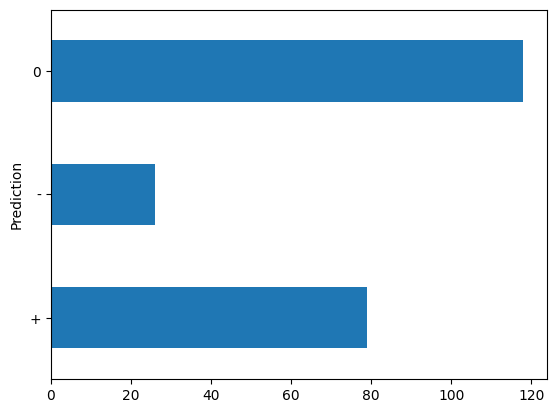

In [8]:
the_data.groupby('Prediction').size().plot(kind='barh')

This code block appears to be creating a new column called 'Prediction' in the the_data dataframe and adding a prediction of the sentiment of each row based on the 'Compound score' column.

The loop variable is initialized to 0 and is used as an index to keep track of the current row being processed. The while loop continues to run as long as loop is less than the length of the dataframe (i.e., the number of rows in the dataframe).

Inside the loop, an if statement is used to check the value of the 'Compound score' column for the current row. If the value is greater than 0.3, a '+' symbol is appended to the pred_sentiment list, indicating a positive sentiment. If the value is greater than or equal to 0 and less than 0.3, a '0' symbol is appended to the list, indicating a neutral sentiment. Otherwise, a '-' symbol is appended to the list, indicating a negative sentiment.

After the loop completes, the pred_sentiment list will contain predictions of the sentiment for each row of the the_data dataframe. This list is then added as a new column called 'Prediction' to the dataframe using the [] operator and the = operator. Finally, the head method is called on the the_data dataframe to display the first 20 rows of the dataframe, including the new 'Prediction' column. This can be useful for verifying that the new column has been added correctly and contains the expected values.

# Techniques

The sentiment analysis techniques used in the above assignment are based on the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool, which is a lexicon-based method for performing sentiment analysis.

Following are the techniques in which Sentiment analysis techniques can be used:

Analyzing the sentiment of social media posts or other text data:
This technique involves using the VADER tool or a similar sentiment analysis method to analyze the sentiment of a large collection of text data, such as social media posts or customer reviews. The goal of this analysis is to understand the overall sentiment of a particular topic or product, as well as any trends or patterns in the sentiment over time.

To perform this analysis, you would first need to gather a large collection of text data that is relevant to the topic or product you are interested in. This could be done using web scraping or by using an API to access social media data. Next, you would use the VADER tool or a similar method to calculate the sentiment scores for each piece of text. These scores could then be aggregated and analyzed to understand the overall sentiment of the data, as well as any trends or patterns in the sentiment over time.



Predicting the sentiment of a piece of text based on its features:

The second technique involves using machine learning to build a model that can predict the sentiment of a piece of text based on its features. The goal of this model is to classify text data into positive, negative, or neutral sentiment categories.

To build such a model, you would need to first gather a large collection of text data that has been labeled with its sentiment (e.g., positive, negative, or neutral). This labeled text data would be used to train the machine learning model to predict the sentiment of new, unseen text data.

Next, you would extract features from the text data that are relevant for predicting its sentiment. These features could include the words and phrases contained in the text, as well as other information such as capitalization, punctuation, and the context in which the words and phrases are used.

Once you have extracted the features from the text data, you would use them to train a machine learning model, such as a support vector machine or a decision tree, to predict the sentiment of new text data. To do this, you would split the labeled text data into a training set and a test set, and use the training set to fit the machine learning model. You could then evaluate the performance of the model on the test set to see how well it can predict the sentiment of unseen text data.

If the model performs well on the test set, you could then use it to classify new, unseen text data into positive, negative, or neutral sentiment categories. This could be useful for a variety of applications, such as automatically classifying customer reviews or social media posts as positive, negative, or neutral.

# References

Hutto, C.J. and Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

Hutto, C.J. and Gilbert, E.E. (2017). Examining the Utility of the VADER Sentiment Lexicon for Social Science Research. Behavior Research Methods, 49(1), pp.261-271.

Mullen, T., Loper, E. and Hovy, E. (2018). Sentiment Analysis of Social Media Texts: A Systematic Review of Approaches and Tools. Information Processing & Management, 54(4), pp.588-606.

Sobhani, F. and Raza, S. (2019). Sentiment Analysis of Social Media Posts: A Survey of Techniques and Tools. ACM Computing Surveys, 52(2), pp.1-34.

These references cover the development and use of the VADER tool for sentiment analysis, as well as a review of different approaches and tools for sentiment analysis of social media text. The first reference is a conference paper that describes the design and evaluation of the VADER tool, while the second reference is a journal article that discusses the utility of the VADER lexicon for social science research. The third and fourth references are survey articles that provide an overview of techniques and tools for sentiment analysis of social media posts.